In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [5]:
# Load the dataset
file_path = "C:\\Users\\ATHARVA\\Downloads\\House Price Pred\\Housing.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Overview:")
print(df.info())
print("\nFirst 5 Rows:")
print(df.head())
print("\nStatistical Summary:")
print(df.describe())


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None

First 5 Rows:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          

In [7]:
# Selecting relevant numerical and categorical features
numerical_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

# One-hot encoding categorical features
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Defining features and target variable
X = df[numerical_features + [col for col in df.columns if col.startswith(tuple(categorical_features))]]
y = df['price']


In [9]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the numerical features
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])


In [11]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict house prices on the testing set
y_pred = model.predict(X_test)


In [13]:
# Compute evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the evaluation results
print("\nModel Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)
print(f"\nMean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared Score: {r2}")



Model Coefficients: [ 519552.41633999   57349.55941862  521879.02774805  349251.43890557
  192005.95366749  367919.94767957  231610.03717565  390251.17618109
  684649.88533879  791426.73584319  629890.56531336 -126881.81758511
 -413645.06222822]
Model Intercept: 3969403.5565888816

Mean Absolute Error: 970043.4039201643
Mean Squared Error: 1754318687330.6685
Root Mean Squared Error: 1324506.9600914405
R-squared Score: 0.6529242642153175


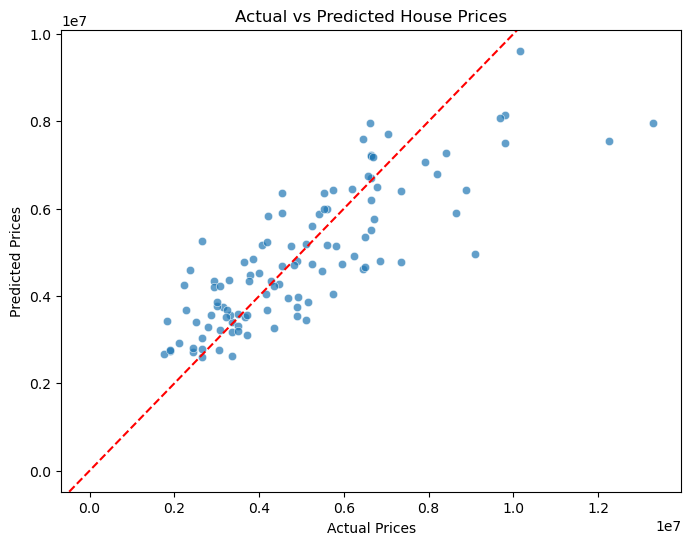

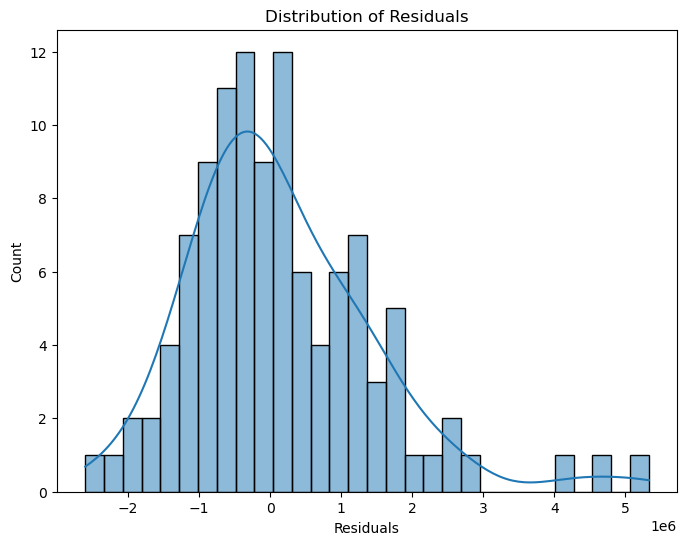

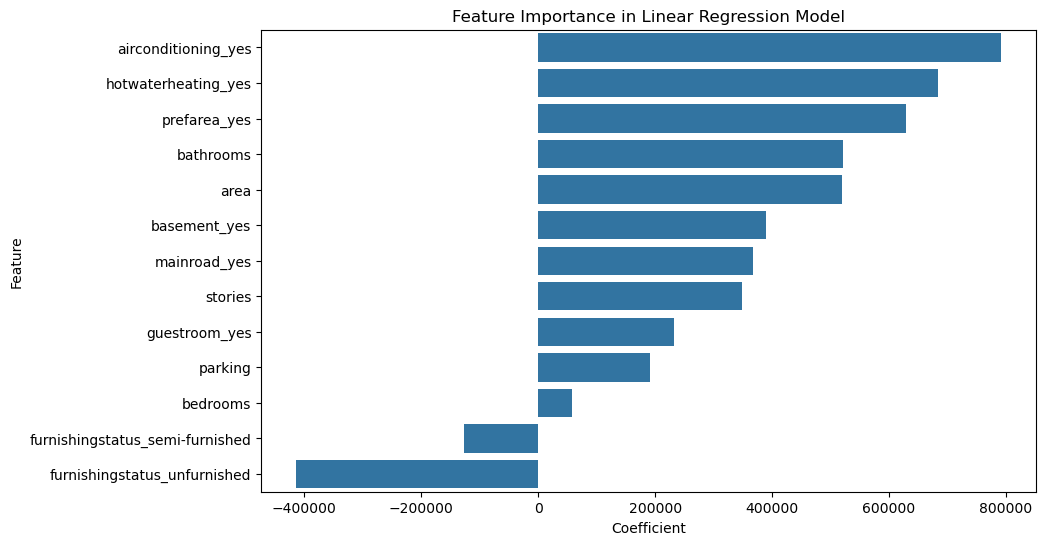

In [15]:
# Plot Actual vs Predicted Prices
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.axline((0, 0), slope=1, color='r', linestyle='--')
plt.show()

# Plot Distribution of Residuals
plt.figure(figsize=(8,6))
sns.histplot(y_test - y_pred, bins=30, kde=True)
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.show()

# Feature Importance Visualization
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
plt.title("Feature Importance in Linear Regression Model")
plt.show()
